In [2]:
#-------------------------------------------------------------------
# READ COMPLETE DATASET INTO MEMORY
#-------------------------------------------------------------------
import pandas as pd
import os
import glob
import ntpath

ignored_features = [
    "timestamp",
    "label_source"
]
label_names = [
    "label:SLEEPING",
    "label:LAB_WORK",
    "label:IN_CLASS",
    "label:IN_A_MEETING",
    "label:LOC_main_workplace",
    "label:OR_indoors",
    "label:OR_outside",
    "label:IN_A_CAR",
    "label:ON_A_BUS",
    "label:DRIVE_-_I_M_THE_DRIVER",
    "label:DRIVE_-_I_M_A_PASSENGER",
    "label:LOC_home",
    "label:FIX_restaurant",
    "label:PHONE_IN_POCKET",
    "label:OR_exercise",
    "label:COOKING",
    "label:SHOPPING",
    "label:STROLLING",
    "label:DRINKING__ALCOHOL_",
    "label:BATHING_-_SHOWER",
    "label:CLEANING",
    "label:DOING_LAUNDRY",
    "label:WASHING_DISHES",
    "label:WATCHING_TV",
    "label:SURFING_THE_INTERNET",
    "label:AT_A_PARTY",
    "label:AT_A_BAR",
    "label:LOC_beach",
    "label:SINGING",
    "label:TALKING",
    "label:COMPUTER_WORK",
    "label:EATING",
    "label:TOILET",
    "label:GROOMING",
    "label:DRESSING",
    "label:AT_THE_GYM",
    "label:STAIRS_-_GOING_UP",
    "label:STAIRS_-_GOING_DOWN",
    "label:ELEVATOR",
    "label:AT_SCHOOL",
    "label:PHONE_IN_HAND",
    "label:PHONE_IN_BAG",
    "label:PHONE_ON_TABLE",
    "label:WITH_CO-WORKERS",
    "label:WITH_FRIENDS",
]
user_id_label_name = "label:user_id"

dataset_directory = os.environ.get("EXTRA_SENSORY_DATASET")
all_files = glob.glob(dataset_directory + "/*.csv")
data_frames = []
for file_name in all_files:
    data_frame = pd.read_csv(file_name, index_col=None, header=0)
    
    user_id = ntpath.basename(file_name)[:-20]
    user_ids = []
    for row_index in range(0, len(data_frame)):
        user_ids.append(user_id)
    
    data_frame[user_id_label_name] = user_ids
    
    data_frames.append(data_frame)

dataset = pd.concat(data_frames, axis=0, ignore_index=True)
dataset = dataset.drop(columns=ignored_features)


In [3]:
#-------------------------------------------------------------------
# EXTRACT USER DATASET
#-------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

dataset_user = dataset\
    .drop(columns=label_names)
X_user = dataset_user.drop(columns=[user_id_label_name])
y_user = dataset_user[user_id_label_name]
y_user = LabelEncoder().fit_transform(y_user)

X_user_train, X_user_test, y_user_train, y_user_test = train_test_split(X_user, y_user, test_size=0.2)


In [3]:
#-------------------------------------------------------------------
# EXTRACT SECONDARY DATASET
#-------------------------------------------------------------------
from sklearn.model_selection import train_test_split

dataset_secondary_activity = dataset\
    .drop(columns=[user_id_label_name])
    #.drop(columns=main_activities)
X_secondary = dataset_secondary_activity.drop(columns=label_names)

y_secondary = dataset_secondary_activity[label_names]
y_secondary = y_secondary.fillna(0);

X_secondary_train, X_secondary_test, y_secondary_train, y_secondary_test = train_test_split(
    X_secondary, y_secondary,
    test_size=0.2,
    random_state=42
)


In [4]:
#-------------------------------------------------------------------
# FIND CORRELATED LABELS
#-------------------------------------------------------------------
correlation = y_secondary.corr()


1.0

In [4]:
import sys
sys.path.append("../../") # gruppe_3 als lib dir
from gruppe_3.order import OrderEstimator
order = OrderEstimator(
    threshold_positive=0.5,
    threshold_negative=-0.5
).estimate(y_secondary)
order


[('label:OR_indoors',
  ['label:SLEEPING', 'label:OR_indoors', 'label:LOC_home']),
 ('label:IN_A_CAR', ['label:IN_A_CAR', 'label:DRIVE_-_I_M_THE_DRIVER']),
 ('label:GROOMING', ['label:GROOMING', 'label:DRESSING']),
 ('label:STAIRS_-_GOING_UP',
  ['label:STAIRS_-_GOING_UP', 'label:STAIRS_-_GOING_DOWN']),
 ('label:STAIRS_-_GOING_DOWN', ['label:STAIRS_-_GOING_DOWN']),
 ('label:DRESSING', ['label:DRESSING']),
 ('label:DRIVE_-_I_M_THE_DRIVER', ['label:DRIVE_-_I_M_THE_DRIVER']),
 ('label:SLEEPING', ['label:SLEEPING']),
 ('label:LOC_home', ['label:LOC_home']),
 ('label:LAB_WORK', ['label:LAB_WORK']),
 ('label:IN_CLASS', ['label:IN_CLASS']),
 ('label:IN_A_MEETING', ['label:IN_A_MEETING']),
 ('label:LOC_main_workplace', ['label:LOC_main_workplace']),
 ('label:OR_outside', ['label:OR_outside']),
 ('label:ON_A_BUS', ['label:ON_A_BUS']),
 ('label:DRIVE_-_I_M_A_PASSENGER', ['label:DRIVE_-_I_M_A_PASSENGER']),
 ('label:FIX_restaurant', ['label:FIX_restaurant']),
 ('label:PHONE_IN_POCKET', ['label:PHO

In [ ]:
import sys
sys.path.append("../../") # gruppe_3 als lib dir
from gruppe_3.order import MutualExclusionDetector
mutex = MutualExclusionDetector().detect(y_secondary)
mutex


iteration: 0
iteration: 1000
iteration: 2000
iteration: 3000
iteration: 4000
iteration: 5000
iteration: 6000
iteration: 7000
iteration: 8000
iteration: 9000
iteration: 10000
iteration: 11000
iteration: 12000
iteration: 13000
iteration: 14000
iteration: 15000
iteration: 16000
iteration: 17000
iteration: 18000
iteration: 19000
iteration: 20000
iteration: 21000
iteration: 22000
iteration: 23000
iteration: 24000
iteration: 25000
iteration: 26000
iteration: 27000
iteration: 28000
iteration: 29000
iteration: 30000
iteration: 31000
iteration: 32000
iteration: 33000
iteration: 34000
iteration: 35000
iteration: 36000
iteration: 37000
iteration: 38000
iteration: 39000
iteration: 40000
iteration: 41000
iteration: 42000
iteration: 43000
iteration: 44000
iteration: 45000
iteration: 46000
iteration: 47000
iteration: 48000
iteration: 49000
iteration: 50000
iteration: 51000
iteration: 52000
iteration: 53000
iteration: 54000
iteration: 55000
iteration: 56000
iteration: 57000
iteration: 58000
iteration:

In [11]:
mutex.to_csv('mutex.csv', sep=',')


In [1]:
import pandas as pd
mutex = pd.read_csv("mutex.csv", index_col=0, sep=',')
mutex


label:SLEEPING  label:LAB_WORK  label:IN_CLASS  \
label:SLEEPING                              0               1               1   
label:LAB_WORK                              1               0               0   
label:IN_CLASS                              1               0               0   
label:IN_A_MEETING                          1               1               1   
label:LOC_main_workplace                    0               0               0   
label:OR_indoors                            0               0               0   
label:OR_outside                            1               1               1   
label:IN_A_CAR                              1               1               1   
label:ON_A_BUS                              1               1               1   
label:DRIVE_-_I_M_THE_DRIVER                1               1               1   
label:DRIVE_-_I_M_A_PASSENGER               1               1               1   
label:LOC_home                              0               1               0   
label:FIX_restaurant                        1               1               1   
label:PHONE_IN_POCKET                       0               0               0   
label:OR_exercise                           1               1               1   
label:COOKING                               1               1               1   
label:SHOPPING                              1               1               1   
label:STROLLING                             1               1               1   
label:DRINKING__ALCOHOL_                    1               1               1   
label:BATHING_-_SHOWER                      1               1               1   
label:CLEANING                              1               1               1   
label:DOING_LAUNDRY                         1               1               1   
label:WASHING_DISHES                        1               1               1   
label:WATCHING_TV                           0               1               1   
label:SURFING_THE_INTERNET                  0               1               0   
label:AT_A_PARTY                            1               1               1   
label:AT_A_BAR                              1               1               1   
label:LOC_beach                             1               1               1   
label:SINGING                               1               1               1   
label:TALKING                               0               0               0   
label:COMPUTER_WORK                         0               0               0   
label:EATING                                0               1               1   
label:TOILET                                0               1               1   
label:GROOMING                              0               1               1   
label:DRESSING                              0               1               1   
label:AT_THE_GYM                            1               1               1   
label:STAIRS_-_GOING_UP                     1               1               1   
label:STAIRS_-_GOING_DOWN                   1               1               1   
label:ELEVATOR                              1               1               1   
label:AT_SCHOOL                             0               0               0   
label:PHONE_IN_HAND                         0               0               0   
label:PHONE_IN_BAG                          0               0               0   
label:PHONE_ON_TABLE                        0               0               0   
label:WITH_CO-WORKERS                       1               0               1   
label:WITH_FRIENDS                          0               1               0   

                               label:IN_A_MEETING  label:LOC_main_workplace  \
label:SLEEPING                                  1                         0   
label:LAB_WORK                                  1                         0   
label:IN_CLASS                                  1                  

In [15]:
mutex_ranking = []
previous_labels = [
    "label:LOC_home",
    "label:SLEEPING",
    "label:OR_indoors",
    "label:PHONE_ON_TABLE",
    "label:PHONE_IN_POCKET",
    "label:PHONE_IN_HAND",
    "label:PHONE_IN_BAG",
    "label:STAIRS_-_GOING_UP",
    "label:STAIRS_-_GOING_DOWN"
]
labels = [c for c in mutex.columns if c not in previous_labels]
for column in labels:
    mutex_ref = []
    for row in labels:
        if mutex[column][row]==1:
            mutex_ref.append(row)
    mutex_ranking.append((column,mutex_ref))
mutex_ranking


[('label:LAB_WORK',
  ['label:IN_A_MEETING',
   'label:OR_outside',
   'label:IN_A_CAR',
   'label:ON_A_BUS',
   'label:DRIVE_-_I_M_THE_DRIVER',
   'label:DRIVE_-_I_M_A_PASSENGER',
   'label:FIX_restaurant',
   'label:OR_exercise',
   'label:COOKING',
   'label:SHOPPING',
   'label:STROLLING',
   'label:DRINKING__ALCOHOL_',
   'label:BATHING_-_SHOWER',
   'label:CLEANING',
   'label:DOING_LAUNDRY',
   'label:WASHING_DISHES',
   'label:WATCHING_TV',
   'label:SURFING_THE_INTERNET',
   'label:AT_A_PARTY',
   'label:AT_A_BAR',
   'label:LOC_beach',
   'label:SINGING',
   'label:EATING',
   'label:TOILET',
   'label:GROOMING',
   'label:DRESSING',
   'label:AT_THE_GYM',
   'label:ELEVATOR',
   'label:WITH_FRIENDS']),
 ('label:IN_CLASS',
  ['label:IN_A_MEETING',
   'label:OR_outside',
   'label:IN_A_CAR',
   'label:ON_A_BUS',
   'label:DRIVE_-_I_M_THE_DRIVER',
   'label:DRIVE_-_I_M_A_PASSENGER',
   'label:FIX_restaurant',
   'label:OR_exercise',
   'label:COOKING',
   'label:SHOPPING',
   '

In [8]:
index = 1
while index < len(mutex_ranking):
    mutex_ranking = sorted(mutex_ranking, key=lambda x: -len(x[1]))
    ref = mutex_ranking[index-1]
    if ref[0] is not None:
        for i in range(index,len(mutex_ranking)):
            sub_ref = mutex_ranking[i]
            if sub_ref[0] in ref[1]:
                mutex_ranking[i] = (None, mutex_ranking[i][1])
            else:
                for el in ref[1]:
                    if el in sub_ref[1]:
                        sub_ref[1].remove(el)
    index+=1
mutex_ranking = [m for m in mutex_ranking if m[0] is not None and len(m[1]) > 0]
mutex_ranking


[('label:AT_THE_GYM',
  ['label:LAB_WORK',
   'label:IN_CLASS',
   'label:IN_A_MEETING',
   'label:LOC_main_workplace',
   'label:OR_outside',
   'label:IN_A_CAR',
   'label:ON_A_BUS',
   'label:DRIVE_-_I_M_THE_DRIVER',
   'label:DRIVE_-_I_M_A_PASSENGER',
   'label:FIX_restaurant',
   'label:COOKING',
   'label:SHOPPING',
   'label:STROLLING',
   'label:DRINKING__ALCOHOL_',
   'label:BATHING_-_SHOWER',
   'label:CLEANING',
   'label:DOING_LAUNDRY',
   'label:WASHING_DISHES',
   'label:WATCHING_TV',
   'label:SURFING_THE_INTERNET',
   'label:AT_A_PARTY',
   'label:AT_A_BAR',
   'label:LOC_beach',
   'label:SINGING',
   'label:TALKING',
   'label:COMPUTER_WORK',
   'label:EATING',
   'label:TOILET',
   'label:GROOMING',
   'label:DRESSING',
   'label:ELEVATOR',
   'label:WITH_CO-WORKERS'])]

In [17]:
labels = [c for c in y_secondary.columns if c not in previous_labels and c not in mutex_ranking[0][1] and c != mutex_ranking[0][0]]
labels


['label:IN_CLASS',
 'label:LOC_main_workplace',
 'label:TALKING',
 'label:COMPUTER_WORK',
 'label:AT_SCHOOL',
 'label:WITH_CO-WORKERS']

In [10]:
from pandas import ExcelWriter
writer = ExcelWriter('mutex.xlsx')
mutex.to_excel(writer,'mutex')
writer.save()


ModuleNotFoundError: No module named 'openpyxl'

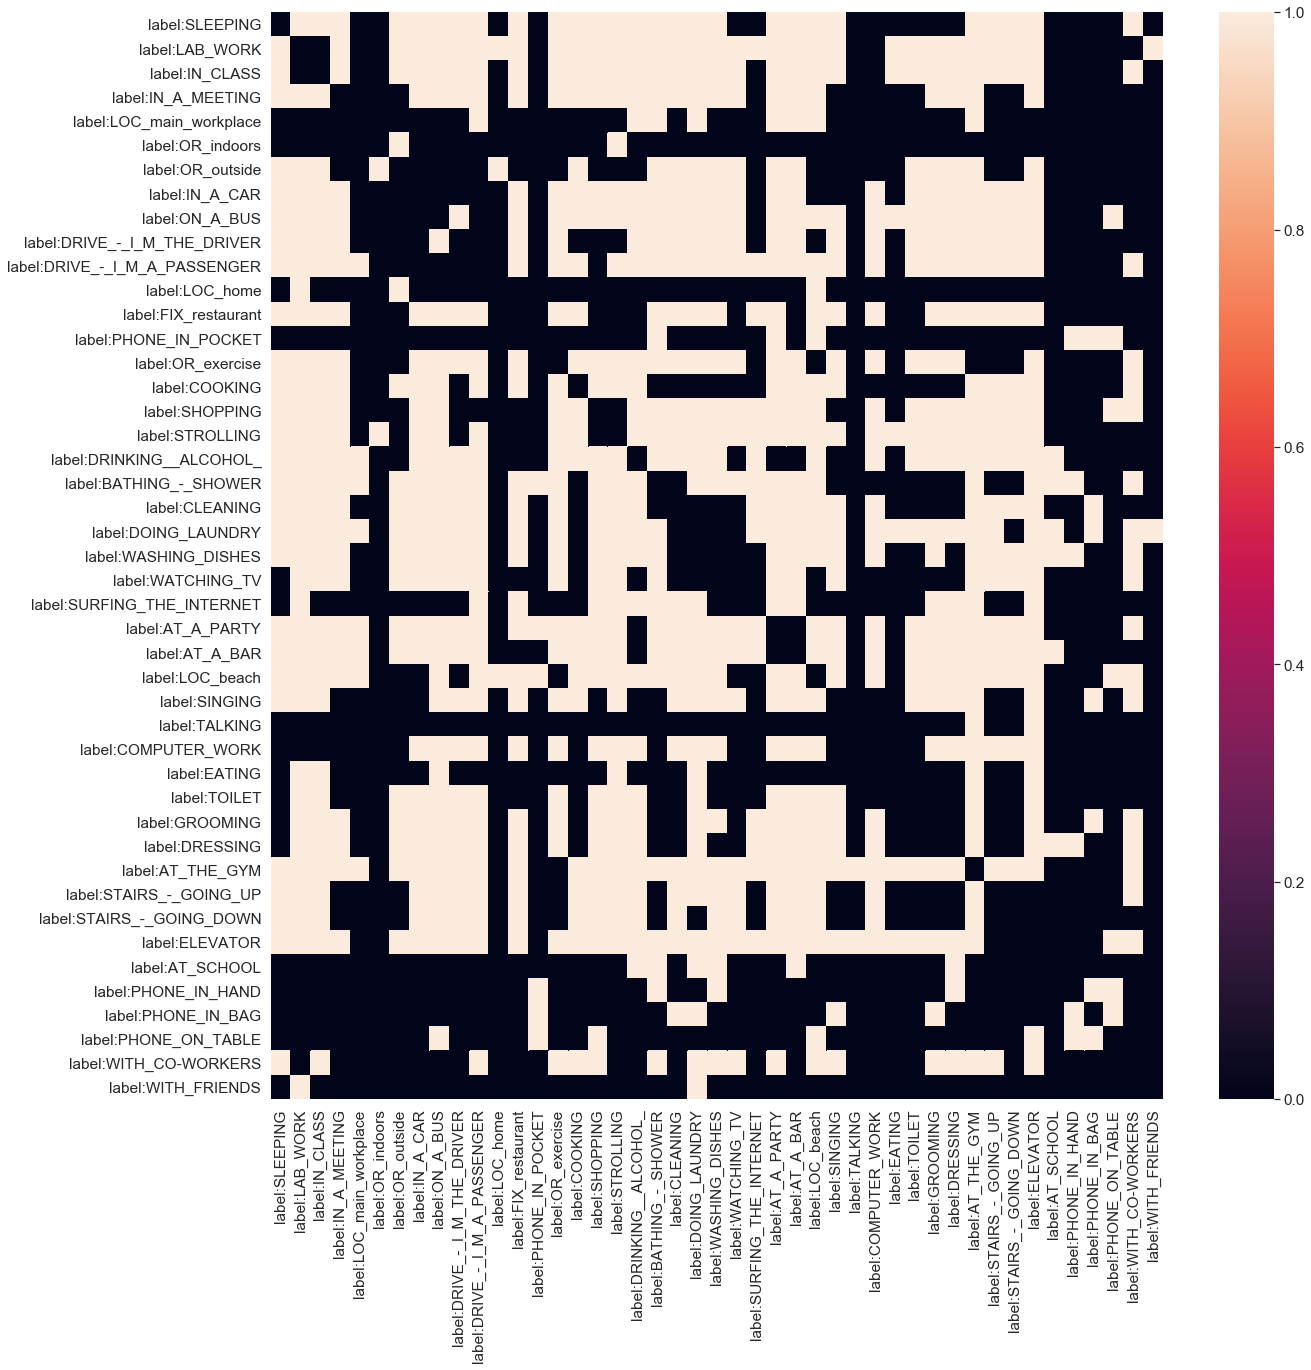

In [5]:
#-------------------------------------------------------------------
# VISUALIZE CORRELATION MATRIX
#-------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.4)
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(mutex, ax=ax, annot_kws={"size": 16})


In [ ]:
#----------------------------------------------------------------------------
# USER PIPELINE CREATION
#----------------------------------------------------------------------------
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from catboost import CatBoostClassifier
from sklearn.decomposition import PCA

pipeline = Pipeline([
    ("impute", SimpleImputer()),
    ("standardize", StandardScaler()),
    ("pca", PCA(n_components=20)),
    ("classify", CatBoostClassifier(
        random_state=42,
        verbose=10,
        task_type="GPU"
    ))
])

y_user_pred = pipeline.fit(X_user_train, y_user_train).predict(X_user_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_user_test, y_user_pred)


0:	learn: -3.9471397	total: 1.5s	remaining: 25m 2s
10:	learn: -3.2260402	total: 15.7s	remaining: 23m 30s


In [6]:
#----------------------------------------------------------------------------
# SECONDARY PIPELINE CREATION
#----------------------------------------------------------------------------
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PowerTransformer
from catboost import CatBoostClassifier
from skmultilearn.problem_transform import ClassifierChain

pipeline = Pipeline([
    ("impute", SimpleImputer()),
    ("standardize", StandardScaler()),
    ("classify", ClassifierChain(classifier=CatBoostClassifier(
        random_state=42,
        verbose=100
    )))
])

y_pred = pipeline\
    .fit(X_secondary_train, y_secondary_train)\
    .predict(X_secondary_test)


Learning rate set to 0.084317
0:	learn: 0.5949165	total: 318ms	remaining: 5m 17s
100:	learn: 0.1426035	total: 13.6s	remaining: 2m 1s
200:	learn: 0.1061989	total: 27s	remaining: 1m 47s
300:	learn: 0.0873071	total: 39.9s	remaining: 1m 32s
400:	learn: 0.0747889	total: 52.8s	remaining: 1m 18s
500:	learn: 0.0656262	total: 1m 5s	remaining: 1m 5s
600:	learn: 0.0587428	total: 1m 19s	remaining: 52.6s
700:	learn: 0.0534111	total: 1m 32s	remaining: 39.4s
800:	learn: 0.0488530	total: 1m 44s	remaining: 26.1s
900:	learn: 0.0450732	total: 1m 57s	remaining: 12.9s
999:	learn: 0.0418584	total: 2m 10s	remaining: 0us
Learning rate set to 0.084317
0:	learn: 0.5118880	total: 153ms	remaining: 2m 32s
100:	learn: 0.0223372	total: 12.9s	remaining: 1m 55s
200:	learn: 0.0171579	total: 25.9s	remaining: 1m 43s
300:	learn: 0.0141511	total: 39s	remaining: 1m 30s
400:	learn: 0.0118615	total: 51.3s	remaining: 1m 16s
500:	learn: 0.0103159	total: 1m 3s	remaining: 1m 3s
600:	learn: 0.0089771	total: 1m 15s	remaining: 50.3s

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_secondary_test, y_pred)


0.5964489201007023

In [7]:
import pickle
# serialize pipeline
pickle.dump(pipeline, open('cat-boost-chain.sav', 'wb'))
